In [146]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.optimizers import Adam
import time

In [147]:
# Hyperparamètres
input_shape = (224, 224, 3)
batch_size = 32
epochs = 20

In [148]:
# Chemins d'accès
train_dir = 'ten_breed_raw_images_split_dataset/train'
val_dir = 'ten_breed_raw_images_split_dataset/val'
test_dir = 'ten_breed_raw_images_split_dataset/test'

In [149]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

In [150]:
# Chargement des données
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1298 images belonging to 10 classes.
Found 369 images belonging to 10 classes.
Found 193 images belonging to 10 classes.


In [151]:
# VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

In [152]:
# Custom layers
x = base_model.output
x = Flatten()(x)
predictions = Dense(10, activation='softmax')(x)

In [153]:
model = Model(inputs=base_model.input, outputs=predictions)

In [154]:
# Feature extraction
for layer in base_model.layers:
    layer.trainable = False

In [155]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(learning_rate=0.001, momentum=0.9),
              metrics=['accuracy'])

In [156]:
# Enregistrement du temps d'entraînement du modèle
start_time = time.time()

In [157]:
model_info = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    verbose=2
)

Epoch 1/20


/Users/tom/Library/Caches/pypoetry/virtualenvs/p6-v1-9AHp3l9q-py3.10/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 - 635s - 15s/step - accuracy: 0.7619 - loss: 55.7316 - val_accuracy: 0.8780 - val_loss: 53.2507
Epoch 2/20
41/41 - 471s - 11s/step - accuracy: 0.9484 - loss: 14.8904 - val_accuracy: 0.9106 - val_loss: 37.3115
Epoch 3/20
41/41 - 558s - 14s/step - accuracy: 0.9861 - loss: 2.7619 - val_accuracy: 0.9187 - val_loss: 37.3074
Epoch 4/20
41/41 - 476s - 12s/step - accuracy: 0.9946 - loss: 0.9099 - val_accuracy: 0.9187 - val_loss: 38.7287
Epoch 5/20
41/41 - 466s - 11s/step - accuracy: 0.9931 - loss: 0.9180 - val_accuracy: 0.9051 - val_loss: 37.0303
Epoch 6/20
41/41 - 472s - 12s/step - accuracy: 0.9954 - loss: 1.1098 - val_accuracy: 0.9133 - val_loss: 39.1983
Epoch 7/20
41/41 - 474s - 12s/step - accuracy: 0.9931 - loss: 1.6148 - val_accuracy: 0.9187 - val_loss: 44.1466
Epoch 8/20
41/41 - 484s - 12s/step - accuracy: 0.9954 - loss: 0.5094 - val_accuracy: 0.9377 - val_loss: 44.7458
Epoch 9/20
41/41 - 484s - 12s/step - accuracy: 0.9985 - loss: 0.2515 - val_accuracy: 0.9295 - val_loss: 38.1155
E

In [158]:
# Fin du temps d'entraînement du modèle
end_time = time.time()

# Calcul du temps écoulé
elapsed_time = end_time - start_time

print("Temps d'entraînement du modèle:", elapsed_time)

Temps d'entraînement du modèle: 9893.185083150864


In [159]:
# Evaluation des performances du modèle sur le jeu de test
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 50s 7s/step - accuracy: 0.9077 - loss: 26.8852
Test accuracy: 0.9378238320350647


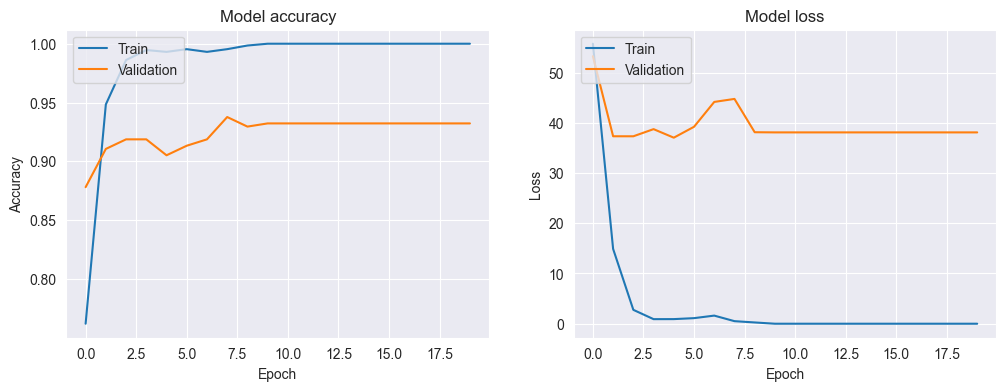

In [160]:
# Visualisation de l'historique d'entraînement
history = model_info.history

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 50s 7s/step
Classification Report:
                               precision    recall  f1-score   support

          n02085620-Chihuahua       1.00      0.75      0.86        16
   n02086646-Blenheim-spaniel       0.95      0.90      0.92        20
             n02088364-beagle       0.90      0.95      0.93        20
 n02091467-Norwegian-elkhound       1.00      0.90      0.95        20
             n02091831-Saluki       0.91      1.00      0.95        20
 n02099712-Labrador-retriever       1.00      0.94      0.97        18
      n02109525-Saint-Bernard       0.94      0.94      0.94        18
                n02110958-pug       0.90      0.95      0.93        20
         n02112018-Pomeranian       0.88      1.00      0.94        23
n02116738-African-hunting-dog       0.95      1.00      0.97        18

                     accuracy                           0.94       193
                    macro avg       0.94      0.93      0.94       193
               

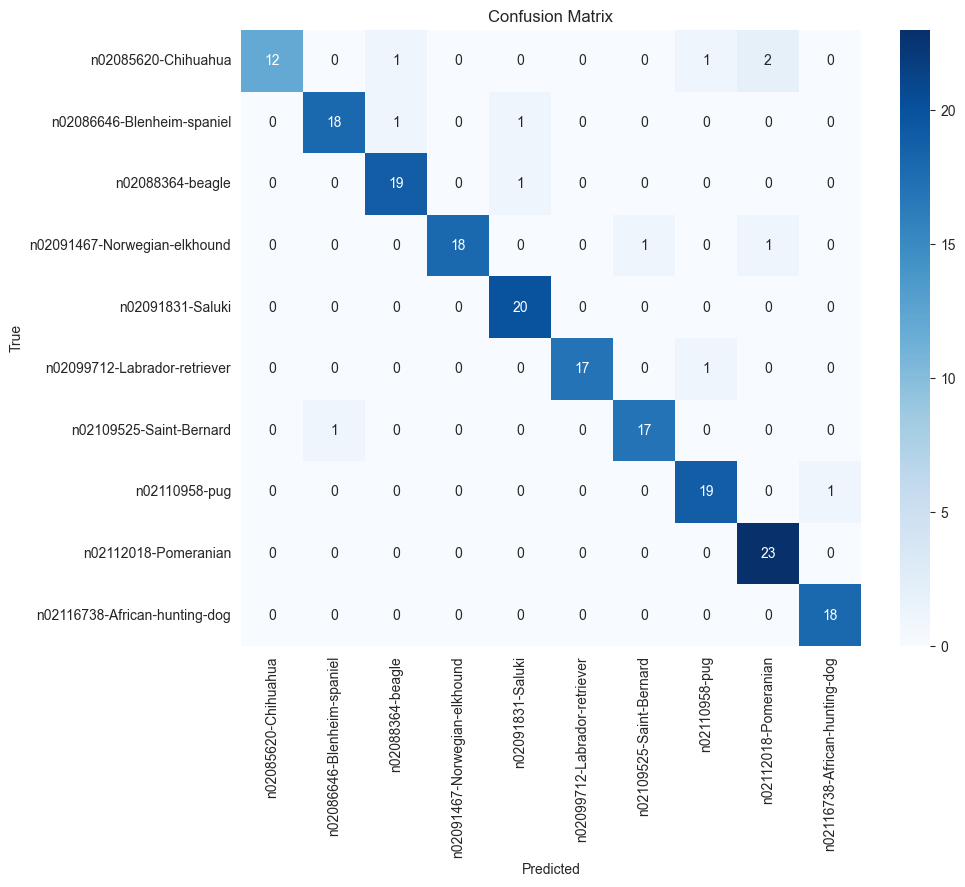

In [161]:
# Classification report et confusion matrix
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [162]:
# Sauvegarde modèle
model.save("feature_extraction_vgg16_ten_breed_final.keras")
print("Saved model to disk")

Saved model to disk


In [163]:
from tensorflow.keras.applications.mobilenet import preprocess_input

# Hyperparamètres
input_shape = (224, 224, 3)
batch_size = 32
epochs = 20

# Chemin d'accès
train_dir = 'ten_breed_raw_images_split_dataset/train'
val_dir = 'ten_breed_raw_images_split_dataset/val'
test_dir = 'ten_breed_raw_images_split_dataset/test'

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

# Chargement des images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1298 images belonging to 10 classes.
Found 369 images belonging to 10 classes.
Found 193 images belonging to 10 classes.


In [164]:
# Feature extraction en utilisant MobileNet
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [165]:
# Custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

In [166]:
model = Model(inputs=base_model.input, outputs=predictions)

In [167]:
# Feature extraction
for layer in base_model.layers:
    layer.trainable = False

In [168]:
# Compilation
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [169]:
# Enregistrement du temps d'entraînement du modèle
start_time = time.time()

In [170]:
# Entraînement
model_info = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

Epoch 1/20


/Users/tom/Library/Caches/pypoetry/virtualenvs/p6-v1-9AHp3l9q-py3.10/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.5992 - loss: 1.4548 - val_accuracy: 0.9431 - val_loss: 0.2190
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.9736 - loss: 0.0849 - val_accuracy: 0.9377 - val_loss: 0.2640
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.9875 - loss: 0.0555 - val_accuracy: 0.9621 - val_loss: 0.1369
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.9975 - loss: 0.0114 - val_accuracy: 0.9729 - val_loss: 0.1160
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.9756 - val_loss: 0.1182
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 1.0000 - loss: 6.4102e-04 - val_accuracy: 0.9729 - val_loss: 0.1157
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 1.0000 - loss: 4.3807e-04 - val_accuracy: 0.9729 - val_loss: 0.1179
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 1.0000 - loss: 3.2952e-04 - val_accuracy: 0.9729 - val_loss

In [171]:
# Fin du temps d'entraînement du modèle
end_time = time.time()

# Calcul du temps écoulé
elapsed_time = end_time - start_time

print("Temps d'entraînement du modèle:", elapsed_time)

Temps d'entraînement du modèle: 1054.2615113258362


In [172]:
# Evaluation des performances du modèle sur le jeu de test
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 807ms/step - accuracy: 0.9549 - loss: 0.0889
Test accuracy: 0.9637305736541748


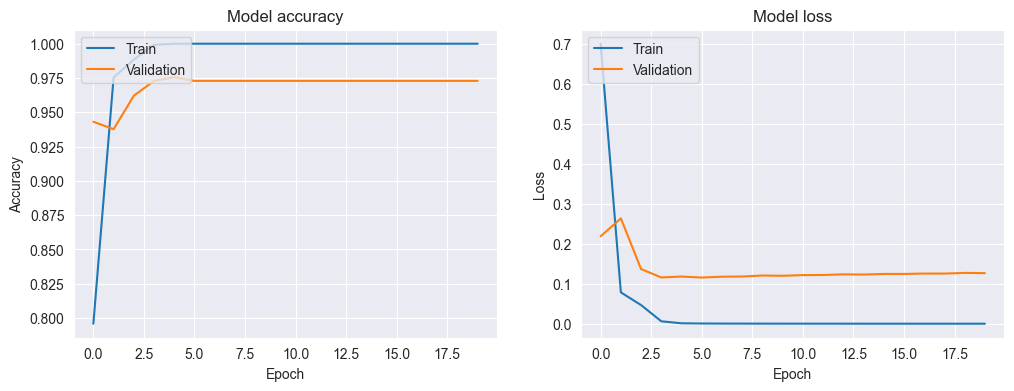

In [173]:
# Visualisation de l'historique d'entraînement
history = model_info.history

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 892ms/step
Classification Report:
                               precision    recall  f1-score   support

          n02085620-Chihuahua       0.94      0.94      0.94        16
   n02086646-Blenheim-spaniel       0.95      0.95      0.95        20
             n02088364-beagle       0.95      0.95      0.95        20
 n02091467-Norwegian-elkhound       1.00      1.00      1.00        20
             n02091831-Saluki       1.00      0.90      0.95        20
 n02099712-Labrador-retriever       0.86      1.00      0.92        18
      n02109525-Saint-Bernard       1.00      0.94      0.97        18
                n02110958-pug       1.00      0.95      0.97        20
         n02112018-Pomeranian       1.00      1.00      1.00        23
n02116738-African-hunting-dog       0.95      1.00      0.97        18

                     accuracy                           0.96       193
                    macro avg       0.96      0.96      0.96       193
             

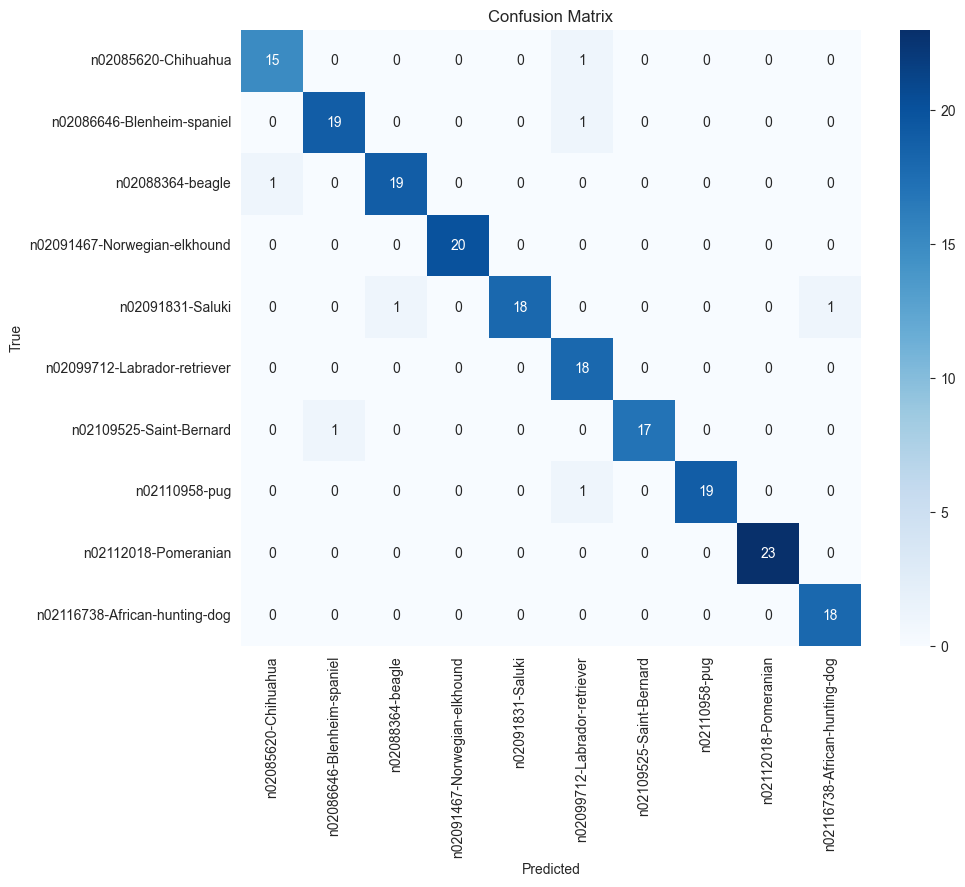

In [174]:
# Classification report et confusion matrix
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [175]:
# save model and architecture to single file
model.save("feature_extraction_mobile_net_ten_breed_untreated_final.keras")
print("Saved model to disk")

Saved model to disk


In [176]:
# Hyperparamètres
input_shape = (224, 224, 3)
batch_size = 32
epochs = 20

# Chemin d'accès
train_dir = 'ten_breed_raw_images_split_dataset/train'
val_dir = 'ten_breed_raw_images_split_dataset/val'
test_dir = 'ten_breed_raw_images_split_dataset/test'

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

# Chargement des images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1298 images belonging to 10 classes.
Found 369 images belonging to 10 classes.
Found 193 images belonging to 10 classes.


In [177]:
# Fine tuning partiel (5 dernières couches) de MobileNet
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [178]:
# Custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

In [179]:
model = Model(inputs=base_model.input, outputs=predictions)

In [180]:
# Fine tuning partiel
for layer in base_model.layers[:5]:
    layer.trainable = False

In [181]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [182]:
# Enregistrement du temps d'entraînement du modèle
start_time = time.time()

In [183]:
# Train the model
model_info = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

Epoch 1/20


/Users/tom/Library/Caches/pypoetry/virtualenvs/p6-v1-9AHp3l9q-py3.10/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 189s 4s/step - accuracy: 0.5533 - loss: 1.4223 - val_accuracy: 0.4309 - val_loss: 2.9767
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 176s 4s/step - accuracy: 0.8975 - loss: 0.3285 - val_accuracy: 0.5285 - val_loss: 2.6113
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 177s 4s/step - accuracy: 0.9560 - loss: 0.1419 - val_accuracy: 0.4146 - val_loss: 4.6168
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 176s 4s/step - accuracy: 0.9468 - loss: 0.1805 - val_accuracy: 0.5935 - val_loss: 2.0790
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 178s 4s/step - accuracy: 0.9425 - loss: 0.1958 - val_accuracy: 0.6911 - val_loss: 1.1829
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 175s 4s/step - accuracy: 0.9579 - loss: 0.1219 - val_accuracy: 0.7236 - val_loss: 1.3423
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 177s 4s/step - accuracy: 0.9663 - loss: 0.1421 - val_accuracy: 0.6152 - val_loss: 2.0070
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 175s 4s/step - accuracy: 0.9335 - loss: 0.2615 - val_accuracy: 0.6775 - val_loss: 1.

In [184]:
# Fin du temps d'entraînement du modèle
end_time = time.time()

# Calcul du temps écoulé
elapsed_time = end_time - start_time

print("Temps d'entraînement du modèle:", elapsed_time)

Temps d'entraînement du modèle: 3532.604146003723


In [185]:
# Evaluation des performances du modèle sur le jeu de test
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 805ms/step - accuracy: 0.7348 - loss: 1.7341
Test accuracy: 0.7512953281402588


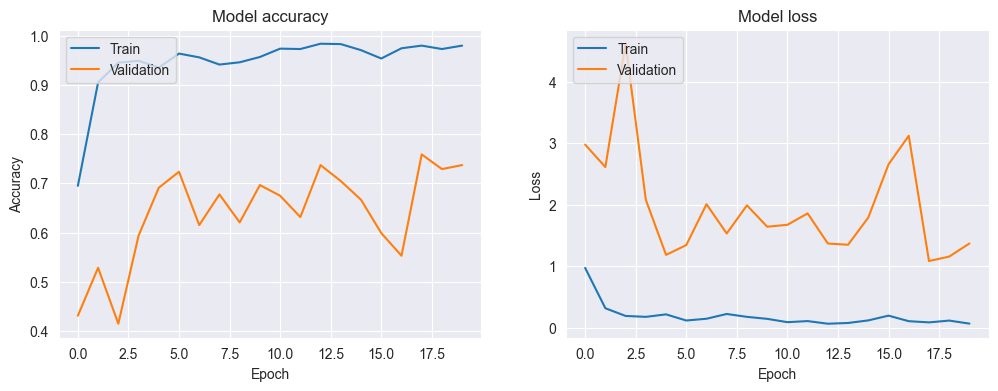

In [186]:
# Visualisation de l'historique d'entraînement
history = model_info.history

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 882ms/step
Classification Report:
                               precision    recall  f1-score   support

          n02085620-Chihuahua       0.83      0.62      0.71        16
   n02086646-Blenheim-spaniel       0.75      0.75      0.75        20
             n02088364-beagle       0.70      0.70      0.70        20
 n02091467-Norwegian-elkhound       0.95      0.90      0.92        20
             n02091831-Saluki       0.57      0.85      0.68        20
 n02099712-Labrador-retriever       0.90      0.50      0.64        18
      n02109525-Saint-Bernard       1.00      0.72      0.84        18
                n02110958-pug       0.90      0.45      0.60        20
         n02112018-Pomeranian       1.00      0.96      0.98        23
n02116738-African-hunting-dog       0.49      1.00      0.65        18

                     accuracy                           0.75       193
                    macro avg       0.81      0.75      0.75       193
             

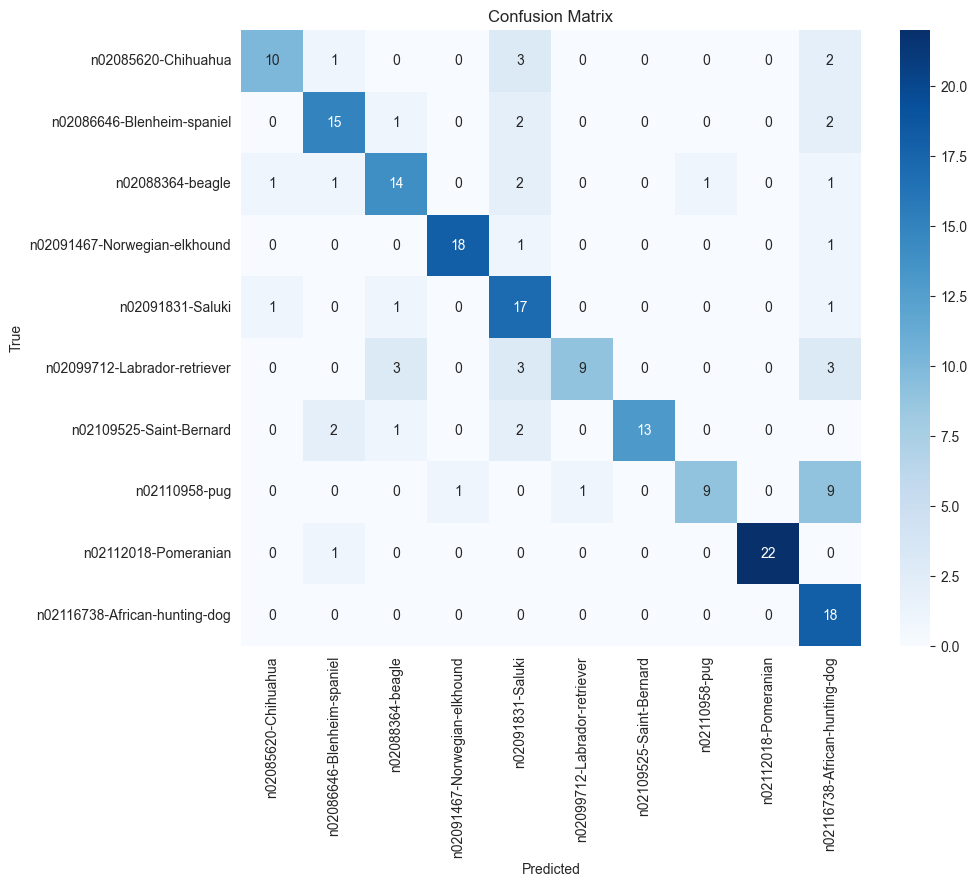

In [187]:
# Classification report et confusion matrix
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [188]:
# save model and architecture to single file
model.save("partially_fine_tuned_mobile_net_ten_breed_untreated.keras")
print("Saved model to disk")

Saved model to disk
